<a href="https://colab.research.google.com/github/FS-Tamim/City-Life-Cycle-Open-GL-project/blob/main/ML_Bilstm_50_glove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Required Libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re

# Importing required libraries
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

# keras
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.utils import to_categorical

from keras.layers import Embedding

from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.layers import Input, Dense, Embedding, Conv2D, MaxPooling2D, Dropout,concatenate
from keras.layers.core import Reshape, Flatten
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.models import Model
from keras import regularizers

# gensim
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

from gensim.models.keyedvectors import KeyedVectors

In [95]:

    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:

stop_words =  set(open('/content/drive/MyDrive/Colab Notebooks/Hostalisty detection system/bd_stopword.txt').read().split())
stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(text):
    return stop_words.sub(" ", text)

def rem_emoticons(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def rem_special_characters(text):
    pattern = re.compile('[!@#$%^&*()_+-={}\[\];:\'\"\|<>,.///?`~।]', flags=re.I)
    return pattern.sub(r'', text)

def rem_non_bangla_characters(text):
    pattern = re.compile('[A-Za-z0-9]', flags=re.I)
    return pattern.sub(r'', text)

In [97]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hostalisty detection system/Hostility_dataset - Hostility_Dataset_main_suffeld.csv")
df

,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm
0,5515,এটাই তো এখনার জুগের মেয়েরা বুঝে না যে তাদের ...,1,1,1,0,0,0
1,10492,: একটা দেশের মন্ত্রী কতো টা নির্লজ্জ হলে এমন ...,0,0,0,0,0,0
2,7219,"আজকের এই পবিত্র দিনে তোরে গালি দিলাম না , ঈদট...",1,1,0,0,0,1
3,10353,আজব একটা মানুষ তুমি ! দুঃখের গল্প বললেও তুমি ...,0,0,0,0,0,0
4,9216,আপনাকে সামনে থেকে দেখলে একটু সালাম করতাম,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
10532,7444,হ্লাত প্রতিবন্ধী হয়ে গেছে! ওরে কেউ এক সামুচ গু...,1,1,0,0,0,1
10533,7495,হ্লাপুত তুই এই দুইটা কি হোগা ম্রা কোটায় পাইছত?,1,1,0,0,0,1
10534,629,হ্লার পৌ হ্লা,1,0,1,0,0,0
10535,2913,NaN,1,1,0,1,0,0


In [98]:
# Generate a boolean mask for the entire dataframe
mask = df.isnull()

# Count the number of null values in each column
null_counts = mask.sum()

# Print the results
print(null_counts)

id                     0
Text                   2
Hostile/Non-Hostile    0
offensive              0
Hate speech            0
threat                 0
defamation             0
sarcasm                0
dtype: int64


In [135]:
  # Clean the text
# df['Text'] = df.Text.apply(lambda x : cleantxt(x))

df['Text'] = df['Text'].astype(str)
data_raw = df 
data_raw['Text'] = data_raw['Text'].apply(removeStopWords)
data_raw['Text'] = data_raw['Text'].apply(rem_emoticons)
data_raw['Text'] = data_raw['Text'].apply(rem_special_characters)
data_raw['Text'] = data_raw['Text'].apply(rem_non_bangla_characters)
df = data_raw

# separate explanatory and dependent variables


In [141]:
X = df.iloc[:,1]
y = df.iloc[:,2:8]

In [142]:
y


,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm
0,1,1,1,0,0,0
1,0,0,0,0,0,0
2,1,1,0,0,0,1
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
10532,1,1,0,0,0,1
10533,1,1,0,0,0,1
10534,1,0,1,0,0,0
10535,1,1,0,1,0,0


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=123)

In [144]:
X_train    

6179     দারুন  পেতে যাচ্ছি ️ অভিনন্দন রইলো মুভিটার  য ️️️
59          ১০০ সেলুট পাওয়ার দাবীদার সুন্দর কথাগুলো গুছানো
6708                 র বেয়াদব  শয়তান ছেলেটা বড়   আওয়ামি হয়
68                              ১৫ বছর  লুটে পুটে খাইছে   
10304                  হালা পুটকির পো পুটকি বলদ মার্কা পিক
                               ...                        
9785     সাউথে  প্রসান্ত নীলরাজা মৌলী   আমাদেরও  রায়হান...
7763     ভদ্রতা কাহা  ওনা দেখলে  অনুসরণ     প্রিয় মানুষ...
5218     জামাতের মি  পুলিশের সন্ত্রাসী হামলা পুলিশ বর্ত...
1346      চা  খুনের বিচার এইভাবে করুক  দেশে সরকার  হইতো...
3582                                      ঔ মাগির ফাসি চাই
Name: Text, Length: 6322, dtype: object

# Implementation of CNN and RNN using word embeddings using word2vec and GloVe for Multi-Label text classification


## 1. Loading Data

In [145]:
print(X_test)

1479                              ভারত টা ছাড়লে তোরা  শেষ 
6486     নবি দিবসের নামে ইসলামের ইতিহা পা    গুলো  কোথা...
10366    হালাল জিনিস  মাণে অল্প   তৃপ্তিকর  আল্লাহ খুশী   
9328     শাওয়া মারানি পাশের লোকটা  গালি খাওয়ানোর  য ফ্র...
5139                  জয় ওলেখক সাহেব হুজুরদের   চুল কানি  
                               ...                        
5830      সামনে পেলে শালী চুদে তোর গাড় ফাটিয়ে দিবো রেন্...
9362     শালা  লাদেশি হিনদুরা  তোর মায়ের গোয়া মারছে    ...
6295                      মনে   পোলি রোগে আক্রান্ত হয়েছেন
8714                 মুসমানরা   যেটা   ভালো     মিথ্ কথা  
5925      ভালবাসার ভেলায়   ভাসতে      ডুবতে পারছি   কথ...
Name: Text, Length: 2107, dtype: object


### 2. Tokenize text of the training data with keras text preprocessing functions ###

In [146]:

# Adding list of Bad words to tokanizer
# bad_words = pd.read_csv("../input/bad-words/bad_words.csv")
bad_words =  list(['word'])

In [147]:
print(X_train)

6179     দারুন  পেতে যাচ্ছি ️ অভিনন্দন রইলো মুভিটার  য ️️️
59          ১০০ সেলুট পাওয়ার দাবীদার সুন্দর কথাগুলো গুছানো
6708                 র বেয়াদব  শয়তান ছেলেটা বড়   আওয়ামি হয়
68                              ১৫ বছর  লুটে পুটে খাইছে   
10304                  হালা পুটকির পো পুটকি বলদ মার্কা পিক
                               ...                        
9785     সাউথে  প্রসান্ত নীলরাজা মৌলী   আমাদেরও  রায়হান...
7763     ভদ্রতা কাহা  ওনা দেখলে  অনুসরণ     প্রিয় মানুষ...
5218     জামাতের মি  পুলিশের সন্ত্রাসী হামলা পুলিশ বর্ত...
1346      চা  খুনের বিচার এইভাবে করুক  দেশে সরকার  হইতো...
3582                                      ঔ মাগির ফাসি চাই
Name: Text, Length: 6322, dtype: object


In [148]:
# Set Maximum number of words to be embedded
NUM_WORDS = 30000

# Define/Load Tokenize text function
tokenizer = Tokenizer(num_words=NUM_WORDS,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'',
                      lower=True)

# Fit the function on the text

tokenizer.fit_on_texts(X_train)

# Count number of unique tokens
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 15162 unique tokens.


In [149]:
# Find top words/tokens by frequency
# [pair[0] for pair in sorted(tokenizer.word_counts.items(), key=lambda item: item[1])]

In [150]:
# size of bad words
num_badwords = len(bad_words)
num_badwords

1

In [151]:
n = 0
temp_bw = bad_words
for word, i in word_index.items():
    if word in bad_words:
        temp_bw.remove(word)
        n = n+1
    if i > (NUM_WORDS-num_badwords+n):
        for bw in temp_bw:
            tokenizer.word_index[bw] = i
            i=i+1
        break           

In [152]:
# Convert train and val to sequence
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_valid=tokenizer.texts_to_sequences(X_val)

In [153]:
from keras.utils import pad_sequences
X_train = pad_sequences(sequences_train,maxlen=100)
X_val = pad_sequences(sequences_valid,maxlen=100)

# Convert target to array
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)

# Printing shape
print('Shape of X train and X validation tensor:', X_train.shape,X_val.shape)
print('Shape of label train and validation tensor:', y_train.shape,y_val.shape)

Shape of X train and X validation tensor: (6322, 100) (2108, 100)
Shape of label train and validation tensor: (6322, 6) (2108, 6)


# word embedding

In [154]:
word_vectors = dict()

# load the whole embedding into memory
f = open('/content/drive/MyDrive/Colab Notebooks/Hostalisty detection system/bn_glove.39M.300d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_vectors[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(word_vectors))

Loaded 178153 word vectors.


In [155]:
EMBEDDING_DIM=300
vocabulary_size=min(len(word_index)+1,(NUM_WORDS))

embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))


for word, i in word_index.items():
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        vec = np.zeros(EMBEDDING_DIM)
        if word in bad_words:
            vec = word_vectors['']
        embedding_matrix[i]=vec

del(word_vectors)

In [156]:
# Dfine Embedding function using the embedding_matrix
embedding_layer = Embedding(vocabulary_size,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            trainable=True)

In [157]:
del(embedding_matrix)

# Build network and train it untill validation loss reduces (EarlyStopping)

In [158]:
# Keras Functional API

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Activation, Dropout,Flatten,Embedding
from keras.layers import Conv1D,MaxPooling1D,GlobalAveragePooling1D, Bidirectional, LSTM, GRU
from keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,Nadam,RMSprop
from tensorflow.keras.models import load_model

In [159]:
sequence_length = X_train.shape[1]
filter_sizes = [3,4]
num_filters = 200
drop = 0.4
max_words=100





# inputs = Input(shape=(sequence_length,))
# embedding = embedding_layer(inputs)
# reshape = Reshape((sequence_length,EMBEDDING_DIM,1))(embedding)

# conv_0 = Conv2D(num_filters, (filter_sizes[0], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
# conv_1 = Conv2D(num_filters, (filter_sizes[1], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)

# maxpool_0 = MaxPooling2D((sequence_length - filter_sizes[0] + 1, 1), strides=(1,1))(conv_0)
# maxpool_1 = MaxPooling2D((sequence_length - filter_sizes[1] + 1, 1), strides=(1,1))(conv_1)

# merged_tensor = concatenate([maxpool_0, maxpool_1], axis=1)
# flatten = Flatten()(merged_tensor)
# reshape = Reshape((2*num_filters,))(flatten)
# dropout = Dropout(drop)(flatten)
# conc = Dense(64)(dropout)
lc_text_inputs = Input(shape=(sequence_length,))
lc_embedding_layer = Embedding(max_words,embedding_dim)(lc_text_inputs)
LSTM_Layer = Bidirectional(LSTM(32,return_sequences=True))(lc_embedding_layer)
lc_conv1 = Conv1D(32,2,activation='relu')(LSTM_Layer)
lc_pool1 = MaxPooling1D(2)(lc_conv1)
lc_flat = Flatten()(lc_pool1)
lc_dense_layer_1 = Dense(6, activation='softmax')(lc_flat)
model = Model(inputs=lc_text_inputs, outputs=lc_dense_layer_1)

# output = Dense(units=6, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01))(conc)

# # this creates a model that includes
# model = Model(inputs, output)

In [160]:
print(model.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_8 (Embedding)     (None, 100, 64)           6400      
                                                                 
 bidirectional_3 (Bidirectio  (None, 100, 64)          24832     
 nal)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 99, 32)            4128      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 49, 32)           0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0   

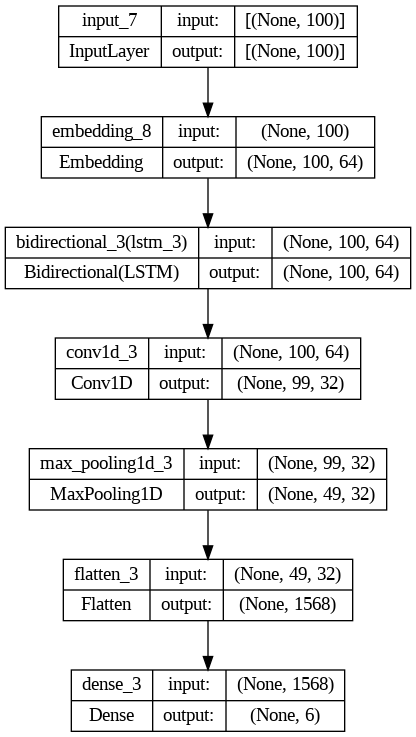

In [161]:
# from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [162]:
# Compiling Model using optimizer
# opt = Adam(lr=1e-3)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Fitting Model to the data
callbacks = [EarlyStopping(monitor='val_accuracy'), EarlyStopping(patience= 10), ModelCheckpoint(filepath='/content/model-CNN-glove.h5', save_best_only=True)]
# hist_adam = model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=2, validation_data=(X_val, y_val),callbacks=callbacks)
  # starts training




In [163]:
hist=     model.fit(X_train, y_train,batch_size= 128, epochs=50, verbose=1, validation_data=(X_val, y_val), callbacks=callbacks)  

Epoch 1/50
50/50 [==============================] - ETA: 0s - loss: 0.5662 - acc: 0.9622

50/50 [==============================] - 14s 168ms/step - loss: 0.5662 - acc: 0.9622 - val_loss: 0.5399 - val_acc: 1.0000
Epoch 2/50
50/50 [==============================] - ETA: 0s - loss: 0.5368 - acc: 1.0000

50/50 [==============================] - 8s 150ms/step - loss: 0.5368 - acc: 1.0000 - val_loss: 0.5298 - val_acc: 1.0000
Epoch 3/50
50/50 [==============================] - ETA: 0s - loss: 0.4931 - acc: 0.9930

50/50 [==============================] - 5s 108ms/step - loss: 0.4931 - acc: 0.9930 - val_loss: 0.4727 - val_acc: 0.9877
Epoch 4/50
50/50 [==============================] - ETA: 0s - loss: 0.4691 - acc: 0.9861

50/50 [==============================] - 7s 130ms/step - loss: 0.4691 - acc: 0.9861 - val_loss: 0.4632 - val_acc: 0.9768
Epoch 5/50
50/50 [==============================] - ETA: 0s - loss: 0.4618 - acc: 0.9823

50/50 [==============================] - 4s 84ms/step - loss: 0.4618 - acc: 0.9823 - val_loss: 0.4591 - val_acc: 0.9962
Epoch 6/50
50/50 [==============================] - ETA: 0s - loss: 0.4577 - acc: 0.9537

50/50 [==============================] - 4s 74ms/step - loss: 0.4577 - acc: 0.9537 - val_loss: 0.4589 - val_acc: 0.9796
Epoch 7/50
50/50 [==============================] - ETA: 0s - loss: 0.4558 - acc: 0.9706

50/50 [==============================] - 4s 69ms/step - loss: 0.4558 - acc: 0.9706 - val_loss: 0.4569 - val_acc: 0.9326
Epoch 8/50
50/50 [==============================] - ETA: 0s - loss: 0.4539 - acc: 0.9745

50/50 [==============================] - 4s 74ms/step - loss: 0.4539 - acc: 0.9745 - val_loss: 0.4551 - val_acc: 0.9730
Epoch 9/50
50/50 [==============================] - ETA: 0s - loss: 0.4538 - acc: 0.9796

50/50 [==============================] - 3s 55ms/step - loss: 0.4538 - acc: 0.9796 - val_loss: 0.4570 - val_acc: 0.9383
Epoch 10/50
50/50 [==============================] - ETA: 0s - loss: 0.4525 - acc: 0.9628

50/50 [==============================] - 2s 40ms/step - loss: 0.4525 - acc: 0.9628 - val_loss: 0.4548 - val_acc: 0.9782
Epoch 11/50
50/50 [==============================] - ETA: 0s - loss: 0.4512 - acc: 0.9717

50/50 [==============================] - 2s 37ms/step - loss: 0.4512 - acc: 0.9717 - val_loss: 0.4534 - val_acc: 0.9459
Epoch 12/50
50/50 [==============================] - ETA: 0s - loss: 0.4511 - acc: 0.9739

50/50 [==============================] - 2s 46ms/step - loss: 0.4511 - acc: 0.9739 - val_loss: 0.4574 - val_acc: 0.9938
Epoch 13/50
50/50 [==============================] - ETA: 0s - loss: 0.4499 - acc: 0.9756

50/50 [==============================] - 3s 56ms/step - loss: 0.4499 - acc: 0.9756 - val_loss: 0.4551 - val_acc: 0.9611
Epoch 14/50
49/50 [============================>.] - ETA: 0s - loss: 0.4486 - acc: 0.9724

50/50 [==============================] - 2s 42ms/step - loss: 0.4486 - acc: 0.9725 - val_loss: 0.4526 - val_acc: 0.9725
Epoch 15/50
50/50 [==============================] - ETA: 0s - loss: 0.4478 - acc: 0.9747

50/50 [==============================] - 2s 31ms/step - loss: 0.4478 - acc: 0.9747 - val_loss: 0.4544 - val_acc: 0.9900
Epoch 16/50
50/50 [==============================] - ETA: 0s - loss: 0.4464 - acc: 0.9731

50/50 [==============================] - 2s 31ms/step - loss: 0.4464 - acc: 0.9731 - val_loss: 0.4543 - val_acc: 0.9606
Epoch 17/50
50/50 [==============================] - ETA: 0s - loss: 0.4458 - acc: 0.9598

50/50 [==============================] - 2s 38ms/step - loss: 0.4458 - acc: 0.9598 - val_loss: 0.4537 - val_acc: 0.9317
Epoch 18/50
50/50 [==============================] - ETA: 0s - loss: 0.4446 - acc: 0.9525

50/50 [==============================] - 1s 28ms/step - loss: 0.4446 - acc: 0.9525 - val_loss: 0.4532 - val_acc: 0.9492
Epoch 19/50
50/50 [==============================] - ETA: 0s - loss: 0.4428 - acc: 0.9568

50/50 [==============================] - 2s 42ms/step - loss: 0.4428 - acc: 0.9568 - val_loss: 0.4532 - val_acc: 0.9568
Epoch 20/50
50/50 [==============================] - ETA: 0s - loss: 0.4423 - acc: 0.9597

50/50 [==============================] - 2s 38ms/step - loss: 0.4423 - acc: 0.9597 - val_loss: 0.4534 - val_acc: 0.9564
Epoch 21/50
50/50 [==============================] - ETA: 0s - loss: 0.4411 - acc: 0.9611

50/50 [==============================] - 2s 45ms/step - loss: 0.4411 - acc: 0.9611 - val_loss: 0.4538 - val_acc: 0.9241
Epoch 22/50
49/50 [============================>.] - ETA: 0s - loss: 0.4406 - acc: 0.9581

50/50 [==============================] - 2s 31ms/step - loss: 0.4402 - acc: 0.9576 - val_loss: 0.4532 - val_acc: 0.9421
Epoch 23/50
50/50 [==============================] - ETA: 0s - loss: 0.4390 - acc: 0.9500

50/50 [==============================] - 1s 24ms/step - loss: 0.4390 - acc: 0.9500 - val_loss: 0.4540 - val_acc: 0.9502
Epoch 24/50
50/50 [==============================] - ETA: 0s - loss: 0.4385 - acc: 0.9565

50/50 [==============================] - 1s 25ms/step - loss: 0.4385 - acc: 0.9565 - val_loss: 0.4532 - val_acc: 0.9502


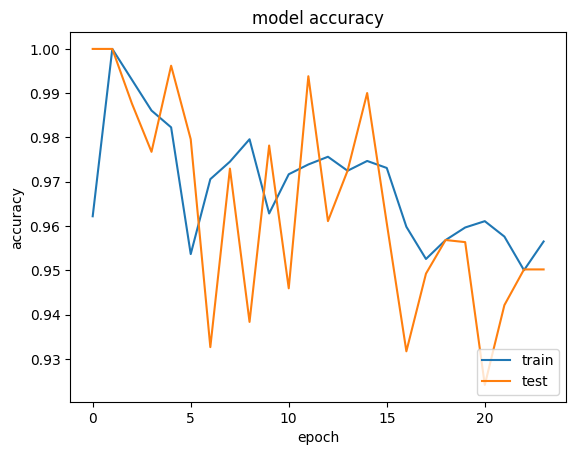

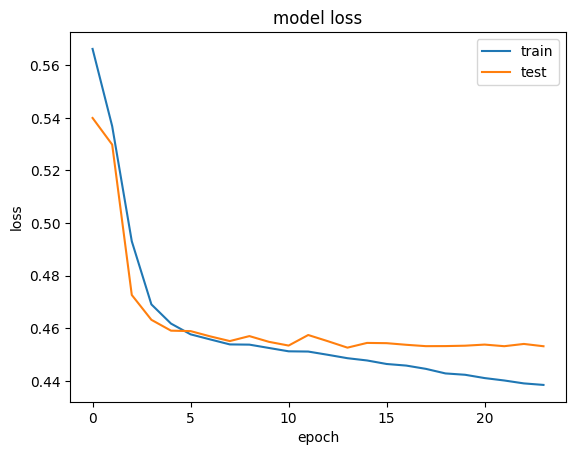

In [164]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

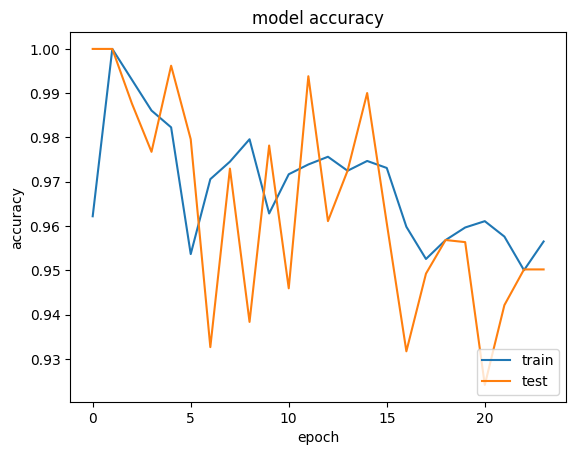

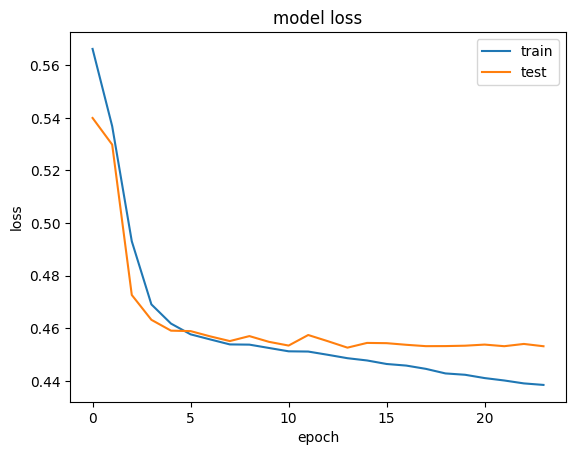

In [165]:
#copy
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [166]:
# convert test to sequence and padding the sequence
sequences_test=tokenizer.texts_to_sequences(X_test)
X_test2 = pad_sequences(sequences_test,maxlen=100)

In [167]:
# Creating empty prediction array
col = ["Hostile/Non-Hostile", "offensive", "Hate speech", "threat", "defamation","sarcasm"]

# Predict on train, val and test datasets
pred_train = model.predict(X_train)
pred_test = model.predict(X_test2)
pred_val = model.predict(X_val)

# Emply array to collect AUC scores
AUC = np.zeros((3,6))
AUC

66/66 [==============================] - 0s 6ms/step


array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [168]:
Y_pred = model.predict_generator(X_test2)
YPred = np.round_(Y_pred)
YPred

<ipython-input-168-0bf6ad0b081c>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(X_test2)


array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [169]:
from sklearn.metrics import multilabel_confusion_matrix
vis_arr = multilabel_confusion_matrix(y_test, YPred)
vis_arr

array([[[ 316,  300],
        [ 101, 1390]],

       [[1420,    0],
        [ 687,    0]],

       [[1617,    0],
        [ 490,    0]],

       [[1812,    0],
        [ 295,    0]],

       [[1643,    0],
        [ 464,    0]],

       [[1622,   60],
        [ 425,    0]]])

In [170]:
from sklearn.metrics import f1_score, precision_score, recall_score
y_pred = YPred
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))
print(f1_score(y_test, y_pred, average=None))

[0.82248521 0.         0.         0.         0.         0.        ]
[0.93226023 0.         0.         0.         0.         0.        ]
[0.87393901 0.         0.         0.         0.         0.        ]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


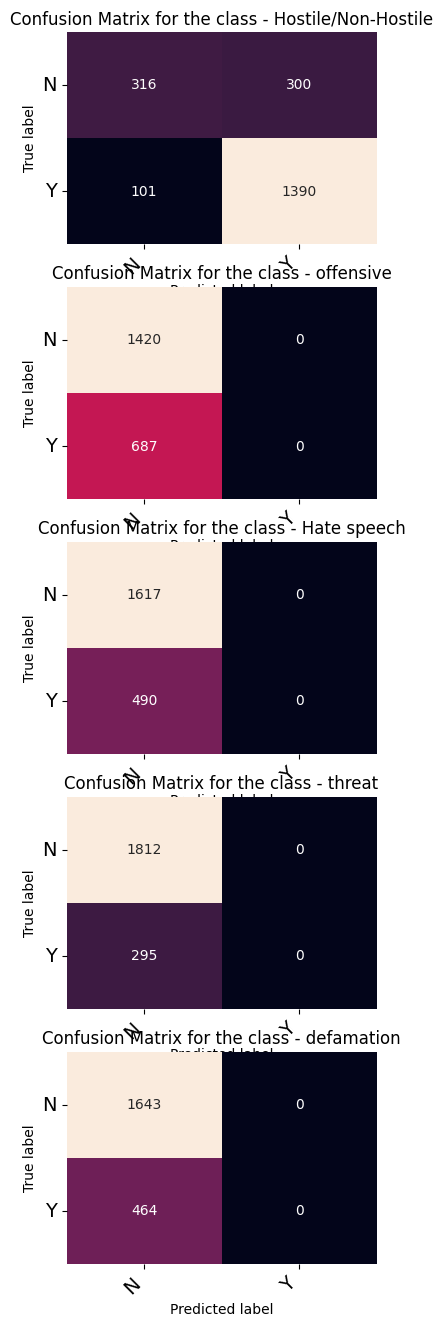

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
labels = ["Hostile/Non-Hostile", "offensive", "Hate speech", "threat", "defamation","sarcasm"]

def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)

fig, ax = plt.subplots(5, 1, figsize=(4, 16))    
for axes, cfs_matrix, label in zip(ax.flatten(), vis_arr, labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])

# fig.tight_layout()
plt.show()


In [172]:
from sklearn.metrics import classification_report
import numpy as np

labels =["Hostile/Non-Hostile", "offensive", "Hate speech", "threat", "defamation","sarcasm"]

y_true = y_test
y_pred = YPred

print(classification_report(y_true, y_pred, target_names=labels))

                     precision    recall  f1-score   support

Hostile/Non-Hostile       0.82      0.93      0.87      1491
          offensive       0.00      0.00      0.00       687
        Hate speech       0.00      0.00      0.00       490
             threat       0.00      0.00      0.00       295
         defamation       0.00      0.00      0.00       464
            sarcasm       0.00      0.00      0.00       425

          micro avg       0.79      0.36      0.50      3852
          macro avg       0.14      0.16      0.15      3852
       weighted avg       0.32      0.36      0.34      3852
        samples avg       0.66      0.27      0.38      3852



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [173]:
print(classification_report(y_true, y_pred, target_names=labels))

                     precision    recall  f1-score   support

Hostile/Non-Hostile       0.82      0.93      0.87      1491
          offensive       0.00      0.00      0.00       687
        Hate speech       0.00      0.00      0.00       490
             threat       0.00      0.00      0.00       295
         defamation       0.00      0.00      0.00       464
            sarcasm       0.00      0.00      0.00       425

          micro avg       0.79      0.36      0.50      3852
          macro avg       0.14      0.16      0.15      3852
       weighted avg       0.32      0.36      0.34      3852
        samples avg       0.66      0.27      0.38      3852



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# save model



# **Confusion matrix**

In [174]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Purples')

    plt.figure(figsize=(4, 3))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.show()

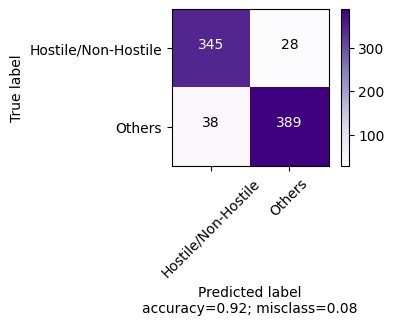

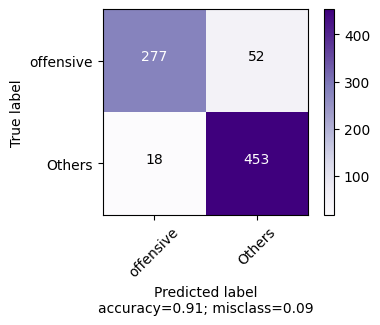

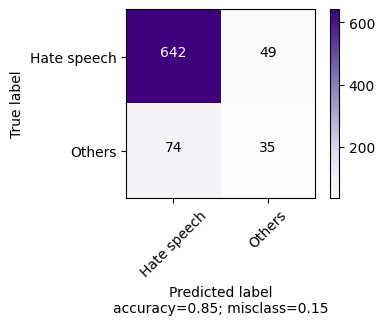

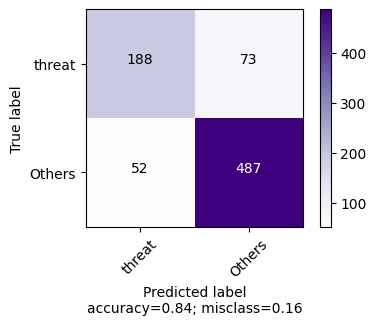

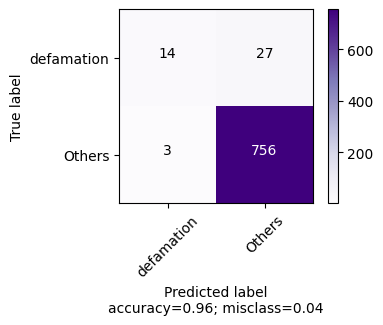

In [175]:
labels = ["Hostile/Non-Hostile", "offensive", "Hate speech", "threat", "defamation","sarcasm"]
conf_mat = [[
        [345,  28],
        [ 38, 389]],

       [[277,  52],
        [ 18, 453]],

       [[ 642,  49],
        [ 74, 35]],

       [[188,  73],
        [ 52, 487]],

       [[14,  27],
        [ 3,  756]]]

for i in range(5):
    plot_confusion_matrix(cm  = np.array(conf_mat[i]), 
                      normalize    = False,
                      target_names = [labels[i], 'Others'],
                      title        = "")